In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer


In [6]:
import os
import numpy as np
import pandas as pd

import glob

path = r'D:\NYU\Semester 2\Big Data Science\Project Idea\Final Project\Code Testing\twitter_data_cleaned_04_24_21' # use your path
all_files = glob.glob(path + "/*.csv")
print(all_files)

li = []

for filename in all_files:
    print(filename)
    df = pd.read_csv(filename, index_col=None,dtype=str, header=0)
    df['comapany'] = filename[107:-19]
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

['D:\\NYU\\Semester 2\\Big Data Science\\Project Idea\\Final Project\\Code Testing\\twitter_data_cleaned_04_24_21\\2_first_solar_tweets_cleaned.csv', 'D:\\NYU\\Semester 2\\Big Data Science\\Project Idea\\Final Project\\Code Testing\\twitter_data_cleaned_04_24_21\\3_siemens_gamesa_tweets_cleaned.csv', 'D:\\NYU\\Semester 2\\Big Data Science\\Project Idea\\Final Project\\Code Testing\\twitter_data_cleaned_04_24_21\\4_plug_power_tweets_cleaned.csv', 'D:\\NYU\\Semester 2\\Big Data Science\\Project Idea\\Final Project\\Code Testing\\twitter_data_cleaned_04_24_21\\5_tesla_tweets_cleaned.csv', 'D:\\NYU\\Semester 2\\Big Data Science\\Project Idea\\Final Project\\Code Testing\\twitter_data_cleaned_04_24_21\\6_sunrun_tweets_cleaned.csv', 'D:\\NYU\\Semester 2\\Big Data Science\\Project Idea\\Final Project\\Code Testing\\twitter_data_cleaned_04_24_21\\7_sunpower_tweets_cleaned.csv', 'D:\\NYU\\Semester 2\\Big Data Science\\Project Idea\\Final Project\\Code Testing\\twitter_data_cleaned_04_24_21\\8_m

In [155]:
test = frame    #.head(10000)
print(test.shape, frame.shape)

(775142, 10) (775142, 10)


In [154]:
def listToString(s): 
    
    # initialize an empty string
    str1 = "" 
    
    # traverse in the string  
    s = s.replace("[", "").replace("]", "").replace("'", "").split(",")
    #print(s)
    for ele in s:
        ele = ele.replace(" ", "")
        
        if(ele.startswith('http')==False ):
            #print("l",ele)
            #print(re.search("http", ele) )
            if(re.search("http", ele)==None ):
                str1 += ele  
                str1+=" "
    
    return str1 
        
        
# Driver code    
s = ['Geeks', 'for', 'Geeks']
print(listToString("['first', 'solar', 'completes', 'sale', 'north', 'american', 'oampm', 'business', 'novasource', 'fslr', 'httpstcojlkofos', 'kkkioiijbhttpstcojlkofos']")) 


first solar completes sale north american oampm business novasource fslr 


In [27]:
def flatten_list(_2d_list):
    flat_list = []
    # Iterate through the outer list
    for element in _2d_list:
        if type(element) is list:
            # If the element is of type list, iterate through the sublist
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list

nested_list = [[1, 2, 3, 4], [5, 6, 7], [8, 9, 10]]
print('Original List', nested_list)
print('Transformed Flat List', flatten_list(nested_list))

Original List [[1, 2, 3, 4], [5, 6, 7], [8, 9, 10]]
Transformed Flat List [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [156]:
name_list = test['comapany'].unique()
print(name_list)

['first_solar' 'siemens_gamesa' 'plug_power' 'tesla' 'sunrun' 'sunpower'
 'meridian_energy']


In [158]:
#For every company perform tfidf and append in one single dataframe
list_tfidf =[]
for name in name_list:
    tfidf_input = test[( test['comapany'] == name )]['Tweet_lemmatized'].apply(listToString).tolist()
    tfIdfVectorizer=TfidfVectorizer(use_idf=True)
    tfIdf = tfIdfVectorizer.fit_transform(tfidf_input)
    df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
    df = df.sort_values('TF-IDF', ascending=False)
    df['company'] = name
    df['word'] = df.index
    list_tfidf.append(df[:25])
    #print (df.head(25)) 

In [159]:
#merge tfidf results into single dataframe from list
res = pd.concat(list_tfidf, axis=0, ignore_index=True)
print(res)

       TF-IDF          company        word
0    0.472210      first_solar  novasource
1    0.408137      first_solar   completes
2    0.401751      first_solar       oampm
3    0.372223      first_solar       north
4    0.339344      first_solar    american
..        ...              ...         ...
170  0.000000  meridian_energy    potlines
171  0.000000  meridian_energy      potter
172  0.000000  meridian_energy         pow
173  0.000000  meridian_energy  powareverb
174  0.000000  meridian_energy        powe

[175 rows x 3 columns]


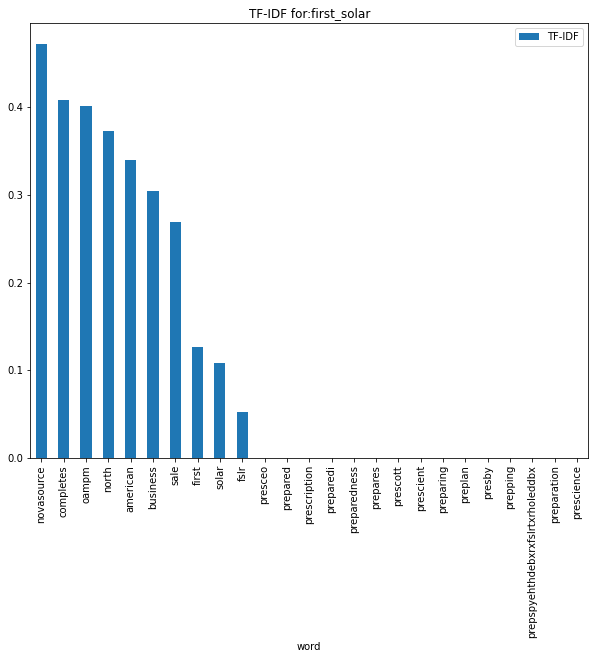

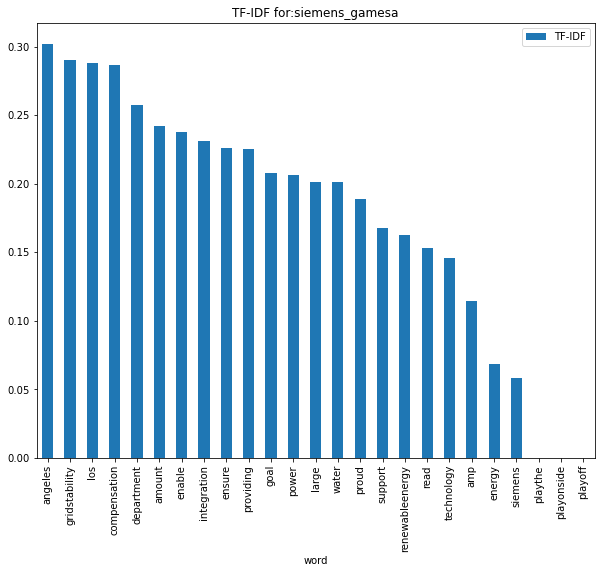

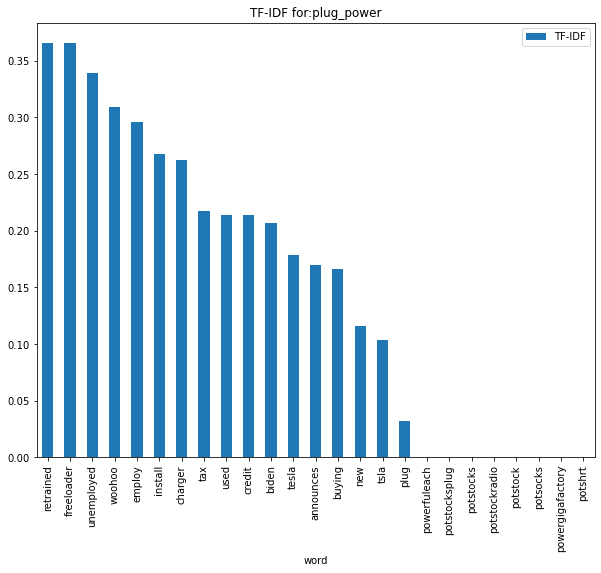

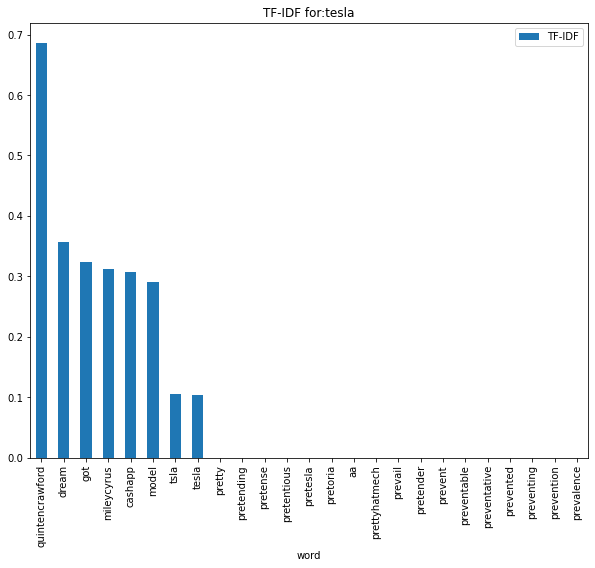

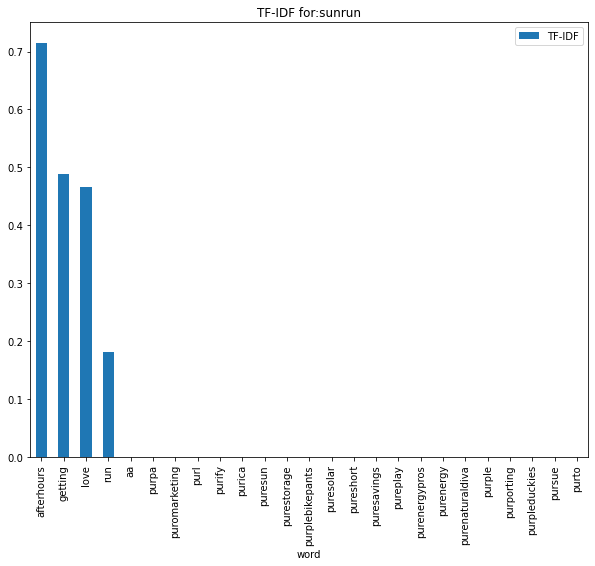

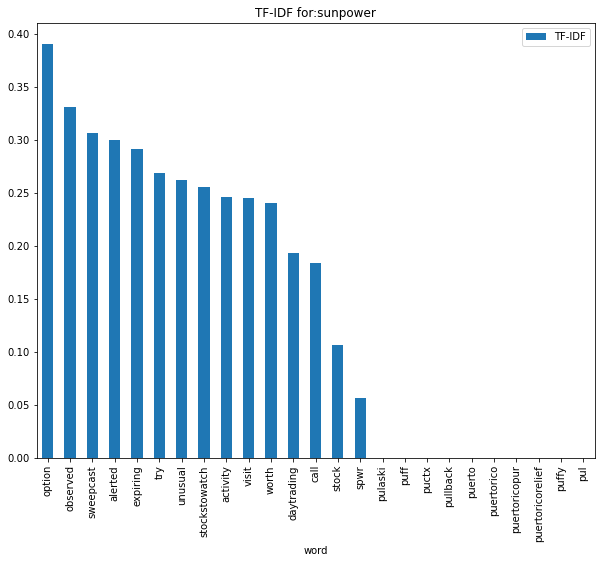

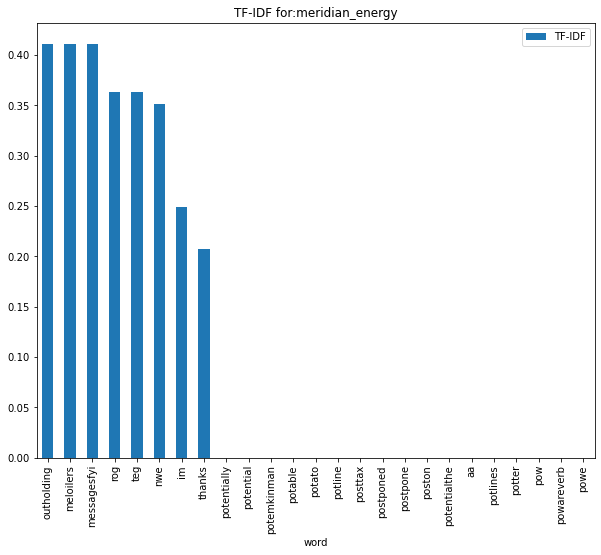

In [184]:
#plot tf-idf resulting charts per company
for name in name_list:
    #print(name)
    gres = res[(res['company'] == name )].set_index('word')
    #plt.title(name)
    ax = gres[(gres['company'] == name)].plot.bar(figsize=(10,8))
    ax.set_title('TF-IDF for:' + name)
    plt.savefig('images/' + name + 'tfidf.png')

In [186]:
# TF-IDF for overall combined data without company seperation
#print(test.head())
tfidf_input = test["Tweet_lemmatized"].apply(listToString).tolist()
tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(tfidf_input)
df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
df['company'] = "all"
df['word'] = df.index
print(df[:50])


                      TF-IDF company                word
novasource          0.527969     all          novasource
oampm               0.408563     all               oampm
completes           0.385776     all           completes
american            0.332645     all            american
north               0.328751     all               north
business            0.254007     all            business
sale                0.232819     all                sale
first               0.185290     all               first
solar               0.136759     all               solar
fslr                0.122527     all                fslr
pressrealeasecbsc   0.000000     all   pressrealeasecbsc
prgn                0.000000     all                prgn
prezzy              0.000000     all              prezzy
prešern             0.000000     all             prešern
prfc                0.000000     all                prfc
prfoits             0.000000     all             prfoits
prft                0.000000   

<class 'pandas.core.frame.DataFrame'>
Index(['TF-IDF'], dtype='object')


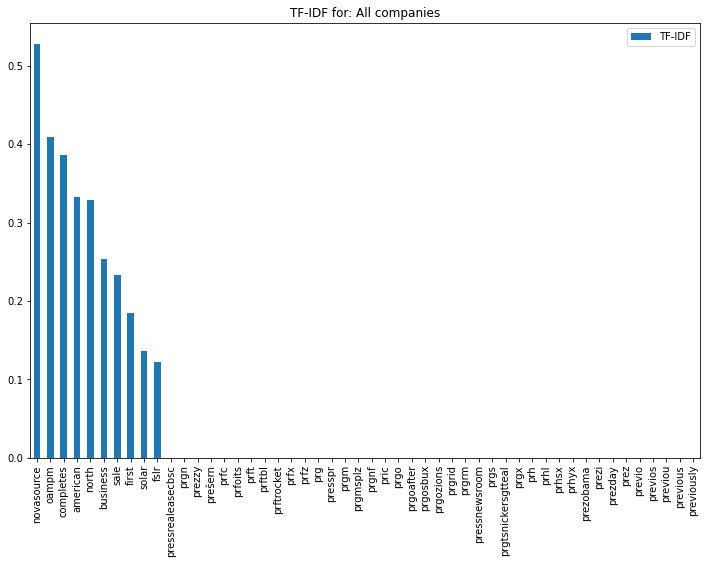

In [183]:
#Save TF-IDF result fr All-companies as image
df2= df[:50]
df3 = df2[['TF-IDF']]
print(type(df3))
print(df3.columns)
#print(df3)
ax = df3.plot.bar(figsize=(12,8))
ax.set_title('TF-IDF for: All companies')
plt.savefig('images/all_tfidf.png')

In [187]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


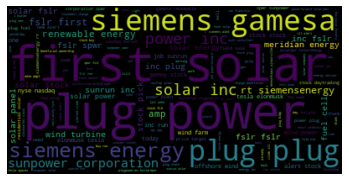

In [188]:
#Merge All data into one group - Testing
text = " ".join(flatten_list(test["Tweet_lemmatized"].apply(listToString).values))

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

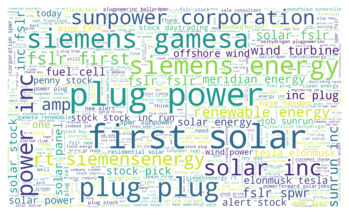

In [199]:
#Overall data wordcloud with customizations - No company split
wordcloud = WordCloud(max_font_size=200, max_words=1000, background_color="white", min_font_size= 12, height = 1200, width = 2000, colormap="viridis").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [200]:
# Save the image in the img folder:
wordcloud.to_file("images/complete_wordcloud2.png")

In [ ]:
## Company wise Word Clouds ##

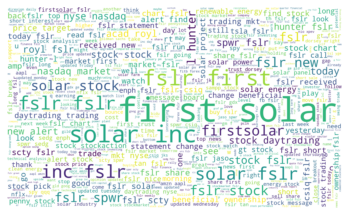

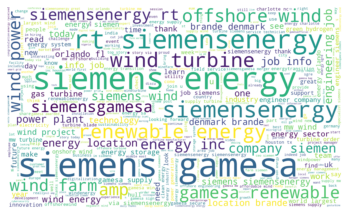

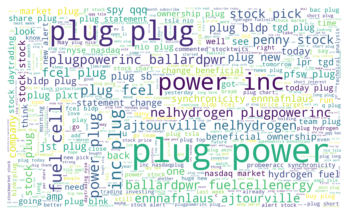

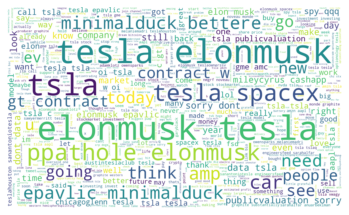

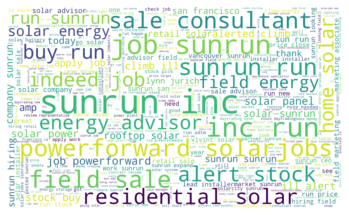

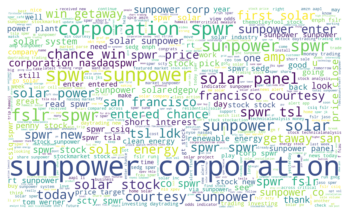

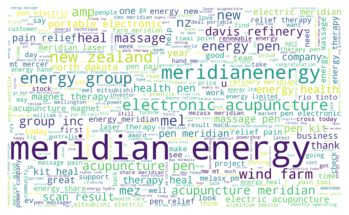

In [202]:
for name in name_list:
    text = " ".join(flatten_list(test[( test['comapany'] == name )]['Tweet_lemmatized'].apply(listToString).values))
    wordcloud = WordCloud(max_font_size=200, max_words=1000, background_color="white", min_font_size= 12, height = 1200, width = 2000, colormap="viridis").generate(text)
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    wordcloud.to_file("images/"+name+ "_wordcloud.png")
   

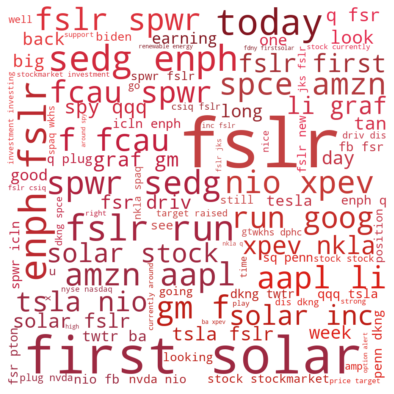

In [50]:
# Generate a word cloud image for sentiments based tweets - change text input to tweet lemmatized for negative sentiment tweets and postive repsectively
wordcloudneg = WordCloud(max_font_size=200, max_words=1000, background_color="white", min_font_size= 12, height = 1200, width = 2000, colormap="RdPu").generate(text)
plt.figure(figsize=[12,10])
plt.imshow(wordcloudneg, interpolation="bilinear")
plt.axis("off")
# store to file
plt.savefig("images/negative_ssentiment.png", format="png")
#plt.show()

# create coloring from image
wordcloudpos = WordCloud(max_font_size=200, max_words=1000, background_color="white", min_font_size= 12, height = 1200, width = 2000, colormap="BuGn").generate(text)
plt.figure(figsize=[12,10])
plt.imshow(wordcloudpos, interpolation="bilinear")
plt.axis("off")
# store to file
plt.savefig("images/positive_sentiment.png", format="png")
#plt.show()